# 收集
## / import lib

In [265]:
# import libs

## official libs
import pprint as pp
import requests

## 3rd libs
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image
#通过 install Pillow安装

## private libs
#包括了一些数据评估的简单功能
import wrangling2 as w

## paras
%matplotlib inline

## / display setting

In [95]:
# set to show all row and column
from IPython.display import display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#!!!Beware of all long out put!!!
#https://stackoverflow.com/questions/27163830/ipython-notebook-pandas-max-allowable-columns

## / load df

In [270]:
# load df
## tweet_json 文件
## read_jason 有很多参数,可以参考官方文档
## 此处要加 lines=True
df_api = pd.read_json('tweet_json.txt',lines=True)
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html

In [99]:
## twitter-archive-enhanced 文件
df_arc = pd.read_csv('twitter-archive-enhanced.txt')

In [100]:
## image-predictions 文件
file_url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
r = requests.get(file_url)
file_name = 'image-predictions.tsv'
open(file_name, 'wb').write(r.content)
df_img = pd.read_csv(file_name, sep='\t')

# 评估 - twitt_json
## / inspect

In [127]:
# pprint, print, display 对比
## pprint 相比 print 提供了复杂结构 iterable 的分块输出
## pprint 和 print 对复杂结构的耗时较长
## display 可以提供相同 pprint 输出, 而且非常快
## 对于 jupyter 环境数据科学, pprint 并不是强需要
'''
data1 = [ (i, { 'a':'A',
               'b':'B',
               'c':'C',
               'd':'D',
               'e':'E',
               'f':'F',
               'g':'G',
               'h':'H',
               }) for i in range(3)
        ]

print(data1)

import pprint as pp
pp.pprint(data1)

display(data1)
'''

In [266]:
# check wranling docstring
print(w.__doc__)


wrangling function list:
1 /df/
1.1 checkdf(df) - 基准df信息输出
1.2 checkdup(df) - 检查重复信息,若数据中包括iterable的列会提醒
1.3 checksample(df,random=42) - 对于列信息很多或者嵌套的,详细输出一个
2 /column/
2.1 checknest(df,colname)
2.2 dorpcolumn(df,collist)
2.3 checkvalue(df,list='all')



In [227]:
checknest(df_api,'entities')

{'hashtags': [],
 'media': [{'display_url': 'pic.twitter.com/v5A4vzSDdc',
            'expanded_url': 'https://twitter.com/dog_rates/status/666051853826850816/photo/1',
            'id': 666051848592334848,
            'id_str': '666051848592334848',
            'indices': [115, 138],
            'media_url': 'http://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg',
            'media_url_https': 'https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg',
            'sizes': {'large': {'h': 1024, 'resize': 'fit', 'w': 866},
                      'medium': {'h': 1024, 'resize': 'fit', 'w': 866},
                      'small': {'h': 680, 'resize': 'fit', 'w': 575},
                      'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
            'type': 'photo',
            'url': 'https://t.co/v5A4vzSDdc'}],
 'symbols': [],
 'urls': [],
 'user_mentions': []}



### // drop1

In [271]:
df_api.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')

In [268]:
df_api.query('reviews == "3.0M"')

UndefinedVariableError: name 'reviews' is not defined

In [12]:
df_api.shape

(2352, 31)

In [13]:
# drop list1
## 先删除重复和无意义的信息
droplist1 = ['contributors','coordinates','geo','place','id_str',
             'in_reply_to_status_id_str','in_reply_to_user_id_str','quoted_status_id_str']

In [14]:
## drop list1 excute
w.drop_column(df_api,droplist1)

---- proceding ----
- drop 8 columns: ['contributors', 'coordinates', 'geo', 'place', 'id_str', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'quoted_status_id_str'] 
- remain 23 columns
- success : True


### // check - inspect list
对一些怀疑是否有用的数据进行检视

In [15]:
# check1 
## snip remained columns
w.check_sample(df_api)

----checking sample index: 1430

- columns #1 : created_at
['2016-02-10T04:06:43.000000000']

- columns #2 : display_text_range
[list([0, 138])]

- columns #3 : entities
[{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 697270435977818113, 'id_str': '697270435977818113', 'indices': [115, 138], 'media_url': 'http://pbs.twimg.com/media/Ca0zxGjW8AEfyYl.jpg', 'media_url_https': 'https://pbs.twimg.com/media/Ca0zxGjW8AEfyYl.jpg', 'url': 'https://t.co/7rS33sCKMS', 'display_url': 'pic.twitter.com/7rS33sCKMS', 'expanded_url': 'https://twitter.com/dog_rates/status/697270446429966336/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 768, 'h': 1024, 'resize': 'fit'}, 'large': {'w': 768, 'h': 1024, 'resize': 'fit'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}}}]}]

- columns #4 : extended_entities
[{'media': [{'id': 697270435977818113, 'id_str': '697270435977818113', 'indices': [115, 138], 'media_url': 'http://p

In [16]:
## define inspect list1
inslist1 = ['favorited','in_reply_to_screen_name','in_reply_to_status_id',
            'in_reply_to_user_id','is_quote_status','lang','possibly_sensitive',
            'possibly_sensitive_appealable','quoted_status_id','retweeted','truncated']

In [17]:
## inspect info
df_api[inslist1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 11 columns):
favorited                        2352 non-null bool
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_user_id              78 non-null float64
is_quote_status                  2352 non-null bool
lang                             2352 non-null object
possibly_sensitive               2211 non-null float64
possibly_sensitive_appealable    2211 non-null float64
quoted_status_id                 29 non-null float64
retweeted                        2352 non-null bool
truncated                        2352 non-null bool
dtypes: bool(4), float64(5), object(2)
memory usage: 137.9+ KB


In [18]:
## inspect value
w.check_value(df_api,inslist1)


- columns: favorited
False    2352
Name: favorited, dtype: int64

- columns: in_reply_to_screen_name
dog_rates          47
markhoppus          2
imgur               1
docmisterio         1
SkyWilliams         1
LightningHoltt      1
shibbnbot           1
NBCSports           1
s8n                 1
ABC7                1
TheEllenShow        1
dhmontgomery        1
Jack_Septic_Eye     1
NonWhiteHat         1
JODYHiGHROLLER      1
serial              1
ABC                 1
Marc_IRL            1
UNC                 1
bragg6of8           1
HistoryInPics       1
spaghemily          1
roushfenway         1
CommonWhiteGirI     1
jonnysun            1
wane15              1
0_kelvin_0          1
mount_alex3         1
RealKentMurphy      1
ComplicitOwl        1
xianmcguire         1
Name: in_reply_to_screen_name, dtype: int64

- columns: in_reply_to_status_id
6.671522e+17    2
8.562860e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
8.265984e+17    1
6.780211e+17    1
6.689207e+17

### // check - quoted_status

In [19]:
# special1 quoted_status
## quoted_status is a dict, move it to detlist
## check values (almost is null)
df_api.quoted_status.isnull().value_counts()

True     2324
False      28
Name: quoted_status, dtype: int64

In [20]:
## check a sample
df_api[df_api.quoted_status.notnull()].sample(1).quoted_status.iloc[0]
### this is some extra info abou a forward

{'created_at': 'Fri Jul 29 23:23:45 +0000 2016',
 'id': 759167558763196416,
 'id_str': '759167558763196416',
 'full_text': 'Dog crashes car into Walmart https://t.co/pg070g3w3r',
 'truncated': False,
 'display_text_range': [0, 52],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/pg070g3w3r',
    'expanded_url': 'http://bit.ly/2aaKfQo',
    'display_url': 'bit.ly/2aaKfQo',
    'indices': [29, 52]}]},
 'source': '<a href="http://twitterfeed.com" rel="nofollow">twitterfeed</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 19925980,
  'id_str': '19925980',
  'name': 'WSAZ NewsChannel 3',
  'screen_name': 'WSAZnews',
  'location': 'Huntington-Charleston,WV',
  'description': "This is WSAZ's online news feed. For Breaking News, follow @WSAZbreaking",
  'url': 'http://t.co/mgej67im9p',
  'entities': {'u

- 分析 `quoted_status`:
    - 是嵌套字典数据
    - 缺失很多(只有28个数据)
    - 内容无用信息比较多
- 结论:
    - 删除此列
    - user 列和此列类似,也删除

### // check - in_reply_to_screen_name

In [21]:
# special2
## in_reply_to_screen_name have value dog_rates for 47 times
df_api.query('in_reply_to_screen_name == "dog_rates"')[:3]

,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,id,in_reply_to_screen_name,in_reply_to_status_id,...,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,retweet_count,retweeted,retweeted_status,source,truncated,user
147,2017-05-12 17:12:53,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 863079538779013120, 'id_str'...",9068,False,Ladies and gentlemen... I found Pipsy. He may ...,863079547188785154,dog_rates,6.671522e+17,...,0.0,0.0,NaN,NaN,1188,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
181,2017-04-24 15:13:52,"[0, 112]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 856526604033556482, 'id_str'...",12412,False,"THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",856526610513747968,dog_rates,8.558181e+17,...,0.0,0.0,NaN,NaN,2053,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
225,2017-04-01 16:41:12,"[0, 135]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,8799,False,Jerry just apuppologized to me. He said there ...,848213670039564288,dog_rates,8.482121e+17,...,NaN,NaN,NaN,NaN,825,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [22]:
df_api['in_reply_to_screen_name'].isnull().sum() / df_api.shape[0]

0.9668367346938775

- 分析`in_reply_to_screen_name`:
    - 可能 `dog_rates` 是默认回复名字
    - 数据缺失率为 97%
- 结论:
    - 删除数据
    
### // drop2
根据上面 check 内容删除数据

In [23]:
# droplist2
droplist2 = inslist1.copy()
### use .copy to copy rather than llink
droplist2.append('quoted_status')
droplist2.append('retweeted_status')
droplist2.append('user')
#droplist2 = ['truncated','retweeted','possibly_sensitive_appealable','possibly_sensitive','lang','is_quote_status','favorited']

In [24]:
## drop2 excute
w.drop_column(df_api,droplist2)

---- proceding ----
- drop 14 columns: ['favorited', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_user_id', 'is_quote_status', 'lang', 'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status_id', 'retweeted', 'truncated', 'quoted_status', 'retweeted_status', 'user'] 
- remain 9 columns
- success : True


### // check - detail columns
对嵌套的数据进行检视

In [25]:
# check3
## recheck sample
w.check_sample(df_api)

----checking sample index: 1205

- columns #1 : created_at
['2016-04-01T00:26:15.000000000']

- columns #2 : display_text_range
[list([0, 139])]

- columns #3 : entities
[{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 715696738036744192, 'id_str': '715696738036744192', 'indices': [116, 139], 'media_url': 'http://pbs.twimg.com/media/Ce6qZC2WAAAcSoI.jpg', 'media_url_https': 'https://pbs.twimg.com/media/Ce6qZC2WAAAcSoI.jpg', 'url': 'https://t.co/cYPHuJYTjC', 'display_url': 'pic.twitter.com/cYPHuJYTjC', 'expanded_url': 'https://twitter.com/dog_rates/status/715696743237730304/photo/1', 'type': 'photo', 'sizes': {'small': {'w': 680, 'h': 680, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 800, 'h': 800, 'resize': 'fit'}, 'medium': {'w': 800, 'h': 800, 'resize': 'fit'}}}]}]

- columns #4 : extended_entities
[{'media': [{'id': 715696738036744192, 'id_str': '715696738036744192', 'indices': [116, 139], 'media_url': 'http://pbs

In [26]:
# detail list1
## check dict long columns
detlist1 = ['entities','extended_entities']

In [27]:
# detail check
w.check_detail(df_api,detlist1)
### not new info  -> drop


- columns #1 : entities
{'hashtags': [],
 'media': [{'display_url': 'pic.twitter.com/MgUWQ76dJU',
            'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
            'id': 892420639486877696,
            'id_str': '892420639486877696',
            'indices': [86, 109],
            'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
            'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
            'sizes': {'large': {'h': 528, 'resize': 'fit', 'w': 540},
                      'medium': {'h': 528, 'resize': 'fit', 'w': 540},
                      'small': {'h': 528, 'resize': 'fit', 'w': 540},
                      'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
            'type': 'photo',
            'url': 'https://t.co/MgUWQ76dJU'}],
 'symbols': [],
 'urls': [],
 'user_mentions': []}

- columns #2 : extended_entities
{'media': [{'display_url': 'pic.twitter.com/MgUWQ76dJU',
            'expanded_url': 'ht

- 分析:
    - 是嵌套字典数据
    - 缺失不多
    - 内容无用信息比较多(有些与其他列有重复)
- 结论:
    - 删除列

### // drop3

In [28]:
# drop list3
droplist3 = detlist1.copy()

## drop3 excute
w.drop_column(df_api,droplist3)

---- proceding ----
- drop 2 columns: ['entities', 'extended_entities'] 
- remain 7 columns
- success : True


### // check - display_text_range
使用函数check_value会在这一列报错,检查下是因为这列的列表嵌套数字的原因

In [29]:
# check specified
df_api.display_text_range.sample(5)

679     [0, 130]
1281    [0, 132]
1432    [0, 137]
348     [0, 116]
1369     [0, 83]
Name: display_text_range, dtype: object

In [30]:
dflist = ['created_at',
 'favorite_count',
 'full_text',
 'id',
 'retweet_count',
 'source']

In [31]:
w.check_value(df_api,dflist)


- columns: created_at
2016-09-12 15:10:21    1
2016-06-03 01:07:16    1
2017-01-31 01:27:39    1
2016-10-13 23:23:56    1
2016-06-27 01:37:04    1
2016-07-26 00:08:05    1
2016-01-05 02:30:55    1
2016-12-14 17:16:53    1
2015-11-27 22:01:40    1
2017-03-26 01:38:00    1
2015-11-20 19:12:01    1
2016-03-12 19:35:15    1
2016-07-17 01:05:25    1
2016-03-13 23:24:56    1
2016-09-15 17:48:25    1
2016-03-01 02:19:31    1
2017-07-25 16:11:53    1
2016-01-08 03:50:03    1
2016-06-25 19:42:08    1
2016-06-25 03:17:46    1
2017-01-06 17:33:29    1
2016-03-27 02:43:58    1
2016-01-19 21:18:22    1
2016-03-05 16:24:01    1
2016-11-24 18:28:13    1
2015-12-02 02:30:43    1
2016-06-13 01:06:33    1
2015-12-12 04:23:49    1
2016-02-29 01:17:46    1
2016-07-18 18:43:07    1
                      ..
2016-09-16 16:00:31    1
2016-03-14 23:19:03    1
2016-03-30 15:34:51    1
2017-07-06 15:58:11    1
2017-02-02 18:52:38    1
2016-01-21 02:10:37    1
2015-12-08 00:15:09    1
2017-06-28 16:09:20    1
20

### // check - null data

In [32]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 7 columns):
created_at            2352 non-null datetime64[ns]
display_text_range    2352 non-null object
favorite_count        2352 non-null int64
full_text             2352 non-null object
id                    2352 non-null int64
retweet_count         2352 non-null int64
source                2352 non-null object
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 128.7+ KB


In [33]:
df_api.isnull().sum()

created_at            0
display_text_range    0
favorite_count        0
full_text             0
id                    0
retweet_count         0
source                0
dtype: int64

### // drop4
想来想去还是把 id 给drop了, 后续分析中用不到还有隐私隐患

In [34]:
droplist4 = ['id']
w.drop_column(df_api,droplist4)

---- proceding ----
- drop 1 columns: ['id'] 
- remain 6 columns
- success : True


### // review (quanlity)
根据数据删除剩余7列 ['created_at', 'display_text_range', 'favorite_count', 'full_text', 'id',
       'retweet_count', 'source']
- id 为标识列
- created_at 包括时间、日期,可以进行时序分析
- display_text_range 为文字长度
- favorite_count 为点赞数
- full_text 为文字内容
- retweet_count 为回复数
- source 为来源

### // persistence

In [35]:
df_api.to_pickle('tweet.pickle.xz', compression='xz')

## / tidyness
根据质量部分的输出,对于除id列之外的需要进行清洁度的整理
- created_at 包括时间、日期,可以进行时序分析
    - 转换为 datafame 的 datetime 格式
- display_text_range 为文字长度
    - 原格式为 [0-x] x实际为推文长度,需要提取 x, 有个别是 [x-y], 不知道为什么还有下限, 提取上限数据即可
    - 本列为非必须列,可以根据 full_text 得出回复长度
- favorite_count 为点赞数
    - 数字类型,无需转换
- full_text 为文字内容
    - 后续如果进行nlp的分析需要进行向量化
- retweet_count 为回复数
    - 数字类型,无需转换
- source 为来源
    - 来源为链接,中间为发布信息的设备
    - 需要使用 re 来完成提取
    - 最后输出为分类信息

### / load clean df

In [36]:
dfclean = pd.read_pickle('tweet.pickle.xz', compression='xz')
dftest = dfclean.copy()
dfclean.sample()

,created_at,display_text_range,favorite_count,full_text,retweet_count,source
2213,2015-11-22 20:37:34,"[0, 139]",493,This is Gòrdón. He enjoys his razberrita by po...,242,"<a href=""http://twitter.com/download/iphone"" r..."


### // created_at
define: 将数据转换为时间格式
- solution1 使用 dataframe 的 datatime 格式
    - 数据本身为 datetime 格式
    - 如果是时序的数据可以将时间转换为 index,非常方便筛选 https://chrisalbon.com/python/data_wrangling/pandas_time_series_basics/
- (solution2 使用 python datatime 格式、calendar格式)

In [37]:
# convert to datetime format
dftest.created_at = pd.to_datetime(dftest.created_at)
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 6 columns):
created_at            2352 non-null datetime64[ns]
display_text_range    2352 non-null object
favorite_count        2352 non-null int64
full_text             2352 non-null object
retweet_count         2352 non-null int64
source                2352 non-null object
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 110.3+ KB


In [38]:
sample = dftest.sample()
sample

,created_at,display_text_range,favorite_count,full_text,retweet_count,source
80,2017-06-20 16:29:50,"[0, 128]",27661,This is Nelly. He graduated with his dogtorate...,5829,"<a href=""http://twitter.com/download/iphone"" r..."


In [39]:
sample.created_at.dt.month, sample.created_at.dt.day, sample.created_at.dt.hour,  

(80    6
 Name: created_at, dtype: int64, 80    20
 Name: created_at, dtype: int64, 80    16
 Name: created_at, dtype: int64)

In [40]:
dftest.tail(10)

,created_at,display_text_range,favorite_count,full_text,retweet_count,source
2342,2015-11-16 01:01:59,"[0, 135]",117,Here is the Rand Paul of retrievers folks! He'...,61,"<a href=""http://twitter.com/download/iphone"" r..."
2343,2015-11-16 00:55:59,"[0, 124]",304,My oh my. This is a rare blond Canadian terrie...,146,"<a href=""http://twitter.com/download/iphone"" r..."
2344,2015-11-16 00:49:46,"[0, 140]",449,Here is a Siberian heavily armored polar bear ...,261,"<a href=""http://twitter.com/download/iphone"" r..."
2345,2015-11-16 00:35:11,"[0, 138]",1250,This is an odd dog. Hard on the outside but lo...,877,"<a href=""http://twitter.com/download/iphone"" r..."
2346,2015-11-16 00:30:50,"[0, 140]",136,This is a truly beautiful English Wilson Staff...,60,"<a href=""http://twitter.com/download/iphone"" r..."
2347,2015-11-16 00:24:50,"[0, 120]",111,Here we have a 1949 1st generation vulpix. Enj...,41,"<a href=""http://twitter.com/download/iphone"" r..."
2348,2015-11-16 00:04:52,"[0, 137]",309,This is a purebred Piers Morgan. Loves to Netf...,147,"<a href=""http://twitter.com/download/iphone"" r..."
2349,2015-11-15 23:21:54,"[0, 130]",128,Here is a very happy pup. Big fan of well-main...,47,"<a href=""http://twitter.com/download/iphone"" r..."
2350,2015-11-15 23:05:30,"[0, 139]",132,This is a western brown Mitsubishi terrier. Up...,48,"<a href=""http://twitter.com/download/iphone"" r..."
2351,2015-11-15 22:32:08,"[0, 131]",2528,Here we have a Japanese Irish Setter. Lost eye...,530,"<a href=""http://twitter.com/download/iphone"" r..."


In [41]:
# 根据上述观察, 发现时间是按照发生顺序倒序排列的
## 时序分析入门 https://ourcodingclub.github.io/2019/01/07/pandas-time-series.html
## 需要转换为 datetime index (方便筛选)
## 将在正式数据上实现
### df.where 可以直接替换,有空测试
dfclean.index = pd.to_datetime(dfclean.created_at)
dfclean.index.name = 'time_index'

In [42]:
droplist = ['created_at']
w.drop_column(dfclean, droplist)

---- proceding ----
- drop 1 columns: ['created_at'] 
- remain 5 columns
- success : True


In [43]:
dfclean['20170101']

,display_text_range,favorite_count,full_text,retweet_count,source
time_index,,,,,
2017-01-01 19:22:38,"[0, 100]",9130,This is Titan. His nose is quite chilly. Reque...,1901,"<a href=""http://twitter.com/download/iphone"" r..."
2017-01-01 02:53:20,"[0, 44]",11423,Happy New Year from the squad! 13/10 for all h...,4388,"<a href=""http://twitter.com/download/iphone"" r..."


### // display_text_range
define: 抽取出 text 的长度,存为整数
- solution1 使用 python standard re lib
    - 抽出字符
    - 转换为 int
- https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html 非常全面的介绍

In [44]:
# code
## extract str
dfclean.display_text_range[:10]

time_index
2017-08-01 16:23:56     [0, 85]
2017-08-01 00:17:27    [0, 138]
2017-07-31 00:18:03    [0, 121]
2017-07-30 15:58:51     [0, 79]
2017-07-29 16:00:24    [0, 138]
2017-07-29 00:08:17    [0, 138]
2017-07-28 16:27:12    [0, 140]
2017-07-28 00:22:40    [0, 118]
2017-07-27 16:25:51    [0, 122]
2017-07-26 15:59:51    [0, 133]
Name: display_text_range, dtype: object

In [45]:
## 使用.str[slice] 直接解析相应位置的数字
dfclean.display_text_range = dfclean.display_text_range.str[1]

In [46]:
dfclean.display_text_range = dfclean.display_text_range.astype(int)
dfclean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2352 entries, 2017-08-01 16:23:56 to 2015-11-15 22:32:08
Data columns (total 5 columns):
display_text_range    2352 non-null int64
favorite_count        2352 non-null int64
full_text             2352 non-null object
retweet_count         2352 non-null int64
source                2352 non-null object
dtypes: int64(3), object(2)
memory usage: 110.2+ KB


In [47]:
dfclean.describe()

,display_text_range,favorite_count,retweet_count
count,2352.000000,2352.000000,2352.000000
mean,111.179847,8109.198980,3134.932398
std,27.364336,11980.795669,5237.846296
min,11.000000,0.000000,0.000000
25%,93.000000,1417.000000,618.000000
50%,116.000000,3596.500000,1456.500000
75%,137.000000,10118.000000,3628.750000
max,165.000000,132318.000000,79116.000000


### // full_text
define:
- 每个评价后面都有一个分值和链接 11/10 https://t.co/8W5iSOgXfx
- 评分为 10/10 或 11/10,没找到说明, 链接科学上网也不能访问
- 需要删除后保存
- 此处不做处理,词云的制作最后再做
- try solution
    - str.replace
    - str[i]
    - str.extract(r'[ab](\d))
    - pat = / str.match
    - str.contains
    - get.dummies(sep=',')

In [48]:
# code
detlist = ['full_text']
dfclean.full_text[:10]

time_index
2017-08-01 16:23:56    This is Phineas. He's a mystical boy. Only eve...
2017-08-01 00:17:27    This is Tilly. She's just checking pup on you....
2017-07-31 00:18:03    This is Archie. He is a rare Norwegian Pouncin...
2017-07-30 15:58:51    This is Darla. She commenced a snooze mid meal...
2017-07-29 16:00:24    This is Franklin. He would like you to stop ca...
2017-07-29 00:08:17    Here we have a majestic great white breaching ...
2017-07-28 16:27:12    Meet Jax. He enjoys ice cream so much he gets ...
2017-07-28 00:22:40    When you watch your owner call another dog a g...
2017-07-27 16:25:51    This is Zoey. She doesn't want to be one of th...
2017-07-26 15:59:51    This is Cassie. She is a college pup. Studying...
Name: full_text, dtype: object

In [49]:
# extrac
dfclean.full_text[1]

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"

In [50]:
## extract testing
s = pd.Series(['a1', 'b2', 'c3'])
s.str.extract(r'([ab])(\d)')

,0,1
0,a,1
1,b,2
2,NaN,NaN


In [51]:
test = dfclean.full_text.str.lower()

In [52]:
test[117]

'this is dewey (pronounced "covfefe"). he\'s having a good walk. arguably the best walk. 13/10 would snug softly https://t.co/hcieajkc4d'

In [53]:
test.str.extract('(\d\d\/\d\d)')[:5]

,0
time_index,
2017-08-01 16:23:56,13/10
2017-08-01 00:17:27,13/10
2017-07-31 00:18:03,12/10
2017-07-30 15:58:51,13/10
2017-07-29 16:00:24,12/10


In [54]:
test.str.extract('(.*)(\d{2}\/\d{2})')[:5]

,0,1
time_index,,
2017-08-01 16:23:56,this is phineas. he's a mystical boy. only eve...,13/10
2017-08-01 00:17:27,this is tilly. she's just checking pup on you....,13/10
2017-07-31 00:18:03,this is archie. he is a rare norwegian pouncin...,12/10
2017-07-30 15:58:51,this is darla. she commenced a snooze mid meal.,13/10
2017-07-29 16:00:24,this is franklin. he would like you to stop ca...,12/10


In [55]:
test.str.extract('(.*)(\d{2}\/\d{2})')[0].str.strip()[:5]

time_index
2017-08-01 16:23:56    this is phineas. he's a mystical boy. only eve...
2017-08-01 00:17:27    this is tilly. she's just checking pup on you....
2017-07-31 00:18:03    this is archie. he is a rare norwegian pouncin...
2017-07-30 15:58:51      this is darla. she commenced a snooze mid meal.
2017-07-29 16:00:24    this is franklin. he would like you to stop ca...
Name: 0, dtype: object

In [56]:
dfclean['clean_text'] = test.str.extract('(.*)(\d{2}\/\d{2})')[0]

In [57]:
droplist = ['full_text']
w.drop_column(dfclean,droplist)

---- proceding ----
- drop 1 columns: ['full_text'] 
- remain 5 columns
- success : True


### // source
define: 抽取出发 tweet 使用的设备
    - 信息是这样的 <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
    - 需要抽取出 `Twitter for iPhone`, 并定义分类为 iphone
    - 将本列做成分类数据
    - 更新
        - 根据value_counts的输出, 95%的来源为iphone, 失去分析价值(Android的去哪里了)
        - 不过起码说明移动的登陆要比网页多很多

In [58]:
# code
## 观察数据
dfclean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2217
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [59]:
## drop
droplist = ['source']
w.drop_column(dfclean, droplist)

---- proceding ----
- drop 1 columns: ['source'] 
- remain 4 columns
- success : True


### // persistence

In [60]:
# code
dfclean.to_pickle('tweetclean.pickle.xz', compression='xz')

# 评估 - twitter-archive-enhanced 
## / quanlity

根据先做的 wtitt jason 的清理，先删除一些列

In [61]:
df_arc.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [62]:
df_arc.shape

(2356, 17)

In [63]:
w.check_sample(df_arc)

----checking sample index: 2240

- columns #1 : tweet_id
[667924896115245057]

- columns #2 : in_reply_to_status_id
[nan]

- columns #3 : in_reply_to_user_id
[nan]

- columns #4 : timestamp
['2015-11-21 04:37:59 +0000']

- columns #5 : source--
['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>']

- columns #6 : text----
['This is Jiminy. He has always wanted to be a cheerleader. Can jump high enough to get on other dog. Go Jiminy. 9/10 https://t.co/fW6kIPFGD2']

- columns #7 : retweeted_status_id
[nan]

- columns #8 : retweeted_status_user_id
[nan]

- columns #9 : retweeted_status_timestamp
[nan]

- columns #10 : expanded_urls
['https://twitter.com/dog_rates/status/667924896115245057/photo/1']

- columns #11 : rating_numerator
[9]

- columns #12 : rating_denominator
[10]

- columns #13 : name----
['Jiminy']

- columns #14 : doggo---
['None']

- columns #15 : floofer-
['None']

- columns #16 : pupper--
['None']

- columns #17 : puppo---
['None']
'----c

In [64]:
df_arc.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [65]:
## define inspect list1
inslist1 = ['name','doggo','floofer', 'pupper','puppo']
inslist2 = ['in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source']
inslist3 = ['retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp']
inslist4 = ['expanded_urls', 'rating_numerator', 'rating_denominator']

In [66]:
for i in inslist1:
    print(('\n- columns: {:-<8}'.format(i)))
    #print((df_arc[i].value_counts().nlargest(5)))
    print((df_arc[i].value_counts()))


- columns: name----
None        745
a            55
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Lola         10
Penny        10
Tucker       10
Bo            9
Winston       9
the           8
Sadie         8
an            7
Daisy         7
Buddy         7
Toby          7
Bailey        7
Koda          6
Leo           6
Bella         6
Jax           6
Oscar         6
Scout         6
Milo          6
Stanley       6
Rusty         6
Jack          6
Dave          6
Phil          5
           ... 
all           1
Gòrdón        1
Brutus        1
Kanu          1
Rumpole       1
Skye          1
Lillie        1
Tayzie        1
Furzey        1
Mo            1
Tycho         1
Banjo         1
Severus       1
Kirk          1
Lucky         1
Bode          1
Remy          1
Edmund        1
Jay           1
Kingsley      1
Bobb          1
Caryl         1
Harlso        1
Superpup      1
Damon         1
Spanky        1
Gunner        1
Amber         1
Reagan        1
Brandy        1
Nam

In [67]:
for i in inslist2:
    print(('\n- columns: {:-<8}'.format(i)))
    print((df_arc[i].value_counts()))


- columns: in_reply_to_status_id
6.671522e+17    2
8.562860e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
8.265984e+17    1
6.780211e+17    1
6.689207e+17    1
6.658147e+17    1
6.737159e+17    1
7.590995e+17    1
8.862664e+17    1
7.384119e+17    1
7.727430e+17    1
7.468859e+17    1
8.634256e+17    1
6.693544e+17    1
6.914169e+17    1
6.920419e+17    1
6.753494e+17    1
7.291135e+17    1
8.406983e+17    1
6.747400e+17    1
7.501805e+17    1
6.744689e+17    1
7.638652e+17    1
6.747934e+17    1
8.503288e+17    1
6.747522e+17    1
8.816070e+17    1
               ..
8.380855e+17    1
8.211526e+17    1
8.558616e+17    1
8.558585e+17    1
7.032559e+17    1
6.678065e+17    1
8.018543e+17    1
7.667118e+17    1
6.855479e+17    1
6.717299e+17    1
6.715610e+17    1
6.758457e+17    1
6.924173e+17    1
7.476487e+17    1
8.381455e+17    1
6.903413e+17    1
8.476062e+17    1
8.352460e+17    1
6.813394e+17    1
8.795538e+17    1
6.860340e+17    1
8.571567e+17    1
6.765883e+17

In [68]:
for i in inslist3:
    print(('\n- columns: {:-<8}'.format(i)))
    print((df_arc[i].value_counts()))


- columns: retweeted_status_id
7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
8.780576e+17    1
7.320056e+17    1
7.186315e+17    1
6.732953e+17    1
7.914070e+17    1
8.447048e+17    1
7.862340e+17    1
8.685523e+17    1
7.504293e+17    1
8.327664e+17    1
6.690004e+17    1
6.873173e+17    1
7.638376e+17    1
7.815247e+17    1
8.092201e+17    1
8.000650e+17    1
8.174239e+17    1
8.001414e+17    1
7.909461e+17    1
7.867091e+17    1
8.406323e+17    1
8.688804e+17    1
7.869631e+17    1
7.733088e+17    1
8.222448e+17    1
               ..
6.816941e+17    1
7.899865e+17    1
7.939622e+17    1
6.800555e+17    1
7.128090e+17    1
8.164506e+17    1
6.769365e+17    1
6.675487e+17    1
8.083449e+17    1
7.626999e+17    1
6.678667e+17    1
8.479710e+17    1
6.820881e+17    1
8.352641e+17    1
7.761133e+17    1
7.902771e+17    1
6.675484e+17    1
7.677549e+17    1
8.782815e+17    1
8.663350e+17    1
7.399792e+17    1
7.403732e+17    1
8.395493e+17  

In [69]:
for i in inslist4:
    print(('\n- columns: {:-<8}'.format(i)))
    print((df_arc[i].value_counts()))


- columns: expanded_urls
https://www.gofundme.com/help-my-baby-sierra-get-better,https://twitter.com/dog_rates/status/873213775632977920/photo/1,https://twitter.com/dog_rates/status/873213775632977920/photo/1                                                                            2
https://twitter.com/dog_rates/status/771380798096281600/photo/1,https://twitter.com/dog_rates/status/771380798096281600/photo/1,https://twitter.com/dog_rates/status/771380798096281600/photo/1,https://twitter.com/dog_rates/status/771380798096281600/photo/1    2
https://twitter.com/dog_rates/status/786963064373534720/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/667182792070062081/photo/1                                                                                                                                

# 评估 - image-predictions
## / quanlity

In [70]:
df_img.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [71]:
inslist5 = ['p1','p1_conf','p1_dog']
w.check_value(df_img,inslist5)


- columns: p1------
golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
Shetland_sheepdog             18
teddy                         18
Maltese_dog                   18
beagle                        18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
Italian_greyhound             16
kuvasz                

# 探索

## / load df

In [72]:
# code
df = pd.read_pickle('tweetclean.pickle.xz', compression='xz')
df.sample()

,display_text_range,favorite_count,retweet_count,clean_text
time_index,,,,
2016-04-13 01:22:10,124,4207,1262,NaN


## / data visulization

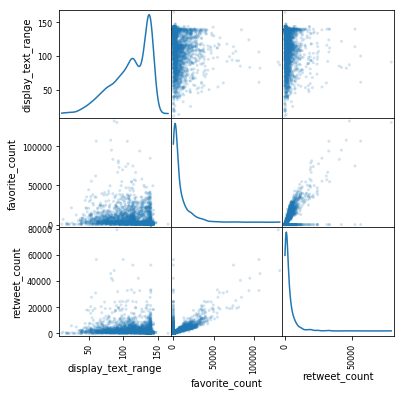

In [73]:
# code
# Scatter Matrix Plot
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde');

In [74]:
df.columns
x = df.columns[0]
y = df.columns[1]
z = df.columns[2]
x, y, z

('display_text_range', 'favorite_count', 'retweet_count')

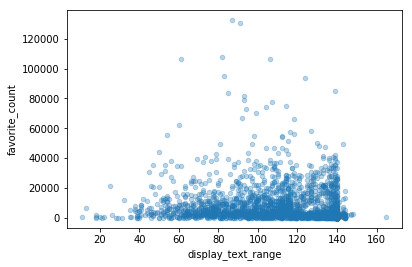

In [75]:
df.plot.scatter(x,y,alpha=0.3);

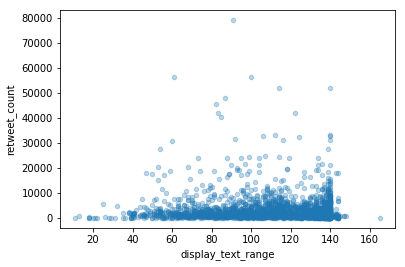

In [76]:
df.plot.scatter(x,z,alpha=0.3);

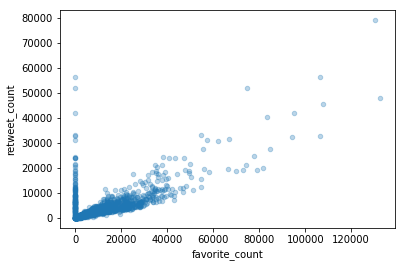

In [77]:
df.plot.scatter(y,z,alpha=0.3);

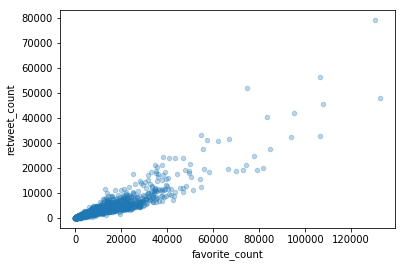

In [78]:
df.query('favorite_count > 0').plot.scatter(y,z,alpha=0.3);

## / word cloud
### // word cloud library

In [79]:
# code
#pip install wordcloud

### // word cloud official example

In [80]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, 'alice.txt')).read()

# read the mask / color image taken from
# http://jirkavinse.deviantart.com/art/quot-Real-Life-quot-Alice-282261010
alice_coloring = np.array(Image.open(path.join(d, "alice_color.png")))
stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_coloring,
               stopwords=stopwords, max_font_size=40, random_state=42)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(alice_coloring)

# show
fig, axes = plt.subplots(1, 3)
axes[0].imshow(wc, interpolation="bilinear")
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
axes[1].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[2].imshow(alice_coloring, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/francis/git/udacity-private/svip_project_lm/p10_wrangling_adv/p_lm/alice.txt'

### // prepare word

In [ ]:
df.clean_text[:5]

In [ ]:
# 使用 sum 前要删除 null 值, 否则会报错
str_input = df.clean_text.dropna()
str_input.isnull().sum()
# 聚合方式可以参考
# https://stackoverflow.com/questions/47465542/how-to-concatenate-all-string-values-in-a-given-pandas-dataframe-row-to-one-st

In [ ]:
text_twitter = str_input.sum()
text_twitter[:1000]

### // word cloud

In [ ]:
# 将图像转为 np 二维数据 (所以是png还是jpeg应该没有关系)
# read the mask / color image taken from
color1 = np.array(Image.open("tweet1.jpeg"))
color2 = np.array(Image.open("tweet2.jpeg"))
color3 = np.array(Image.open("t1.png"))
color4 = np.array(Image.open("t2.png"))

# 设置停用词
stopwords = set(STOPWORDS)
stopwords.add("said")

In [ ]:
# wordcloud 参数
wc = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, max_font_size=40, random_state=42)

## https://github.com/amueller/word_cloud 
## git 中提供例子和cli(可以根据 text 和 pic 直接输出词云, 非常方便

In [ ]:
# wc.generate(text);

In [ ]:
wc.generate(text_twitter);

In [ ]:
# create coloring from image
image_colors = ImageColorGenerator(color4)

# 可以直接在构造函数中直接给颜色
# 通过这种方式词云将会按照给定的图片颜色布局生成字体颜色策略

# show
fig, axes = plt.subplots(1, 3, figsize=(24,4))
axes[0].imshow(wc, interpolation="bilinear")
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
axes[1].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[2].imshow(color4, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off();
plt.show();

In [ ]:
# 增加 mask 蒙版系列
wc = WordCloud(background_color="white", max_words=2000, mask=color4,
               stopwords=stopwords, max_font_size=40, random_state=42)
wc.generate(text_twitter);

In [ ]:
# create coloring from image
image_colors = ImageColorGenerator(color4)

# 可以直接在构造函数中直接给颜色
# 通过这种方式词云将会按照给定的图片颜色布局生成字体颜色策略

# show
fig, axes = plt.subplots(1, 3, figsize=(24,4))
axes[0].imshow(wc, interpolation="bilinear")
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
axes[1].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[2].imshow(color4, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off();
plt.show();

In [ ]:
# 输出两个图像做对比
# show
fig, axes = plt.subplots(2, 1, figsize=(20,4))
axes[0].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[1].imshow(color4, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off();
plt.show();
## 不是特别美观, 看来wordcloud如果使用mask和图像的样子关系很大

In [ ]:
# 增加 mask 蒙版系列2
wc = WordCloud(background_color="white", max_words=200, mask=color2,
               stopwords=stopwords, max_font_size=40, random_state=42)
wc.generate(text_twitter);

# create coloring from image
image_colors = ImageColorGenerator(color2)

# 可以直接在构造函数中直接给颜色
# 通过这种方式词云将会按照给定的图片颜色布局生成字体颜色策略

# 输出两个图像做对比
# show
fig, axes = plt.subplots(2, 1)
axes[0].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[1].imshow(color2, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off();
plt.show();
## 不是特别美观, 看来wordcloud如果使用mask和图像的样子关系很大
### 大小和图片分辨率相同
### 遇到有的图片会报错
## 感觉对分词如果用 nltk 处理下可能会更好
### https://sqlshep.com/?p=971
# 更新! relative_scaling 参数特别重要(见结论图)

## / time series analysis
https://ourcodingclub.github.io/2019/01/07/pandas-time-series.html

In [ ]:
df.head(10)

In [ ]:
# check intervals
print("Dataframe shape: ", df.shape)
dt = (df.index[0] - df.index[-1])
print("Number of hours between start and end dates: ", dt.total_seconds()/3600 + 1)
dt

In [ ]:
#df.plot(figsize=(15,4))
df.plot(subplots=True, figsize=(15,6))
df.plot(y=["favorite_count", "retweet_count"], figsize=(15,4));

In [ ]:
df[["favorite_count", "retweet_count"]].resample("1w").median().plot(figsize=(15,4));

In [ ]:
df[["favorite_count", "retweet_count"]].rolling(30).median().plot(figsize=(15,4));

In [ ]:
# 如果是周期的可以用这个(后续研究)
pd.plotting.autocorrelation_plot(df["favorite_count"].resample("1w").median());

## / sentiment analysis
- 使用sklearn https://towardsdatascience.com/sentiment-analysis-with-python-part-1-5ce197074184
- 另外比较常见的是使用 nltk 库
- 此处先pass, 深度学习时候有空再深入

# 结论
## / favorite 和 retweet 时序分析
- 2016年上半年之前, favorite 数量大概是 retweet 的两倍
- 但再这之后, favorite 数量大量上涨, retweet 数量上涨十分缓慢(两者之比达到6倍)
- 推测相关因素如下:
    - 可以看出 twitter 增长非常迅速(可惜缺少用户量相关的数据)
    - 但是人们愿意付出更多一点时间 retweet 的时间在减少, 可能原因是当人接触到更多的 twitter 信息后, 能够 retweet 的注意力已经没有什么增长空间了(注意力处于饱和状态)

In [ ]:
# 使用30天滚动平均值完成作图
df[["favorite_count", "retweet_count"]].rolling(30).median().plot(figsize=(15,4));
plt.xlabel('Time Series')
plt.ylabel('Counts')
plt.title('Compare Favorite and Retweet Counts on Time Series', color='r', fontsize=16);

## / favorate 和 retweet 相关性分析
- 分析中过滤掉了 retweet 为0的数据和大于1000的数据
- 此处考虑的是两个参数的对应关系, 和问题1的趋势并不冲突(因为数据做了过滤)
- 可以看出在 favorate 和 retweet 两个数据中间具有相关性
- 回归线要用到 sm 库或 sklearn 库, 后续研究 https://nbviewer.jupyter.org/github/weecology/progbio/blob/master/ipynbs/statistics.ipynb

In [ ]:
df.query('0 < favorite_count < 10000').plot.scatter(y,z,alpha=0.2,figsize=(15,4));
plt.xlabel('Time Series')
plt.ylabel('Counts')
plt.title('Compare Favorite and Retweet Counts on Time Series', color='r', fontsize=16);

## / word cloud 分析
- 对评论使用 word cloud 进行分析
- 去掉了 stop words
- 图像为 twitter 英文字符(小鸟图不太美观)

In [ ]:
# set wc paras
wc = WordCloud(background_color="white", max_words=1000, mask=color4,
               stopwords=stopwords, max_font_size=24, relative_scaling=0.3, width=2400, height=800, random_state=42)

# gen wc
wc.generate(text_twitter);

# create coloring from image
image_colors = ImageColorGenerator(color4)

# gen pic
fig, axes = plt.subplots(2, 1,figsize=(36,12))
axes[0].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[1].imshow(color4, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off();
plt.show();

## / text range 分析
- text range 改名为 text range 更为明确
- 数据做了过滤(过滤掉了个别 160 字符的)
- 数据有左偏斜趋势 (不能断定) 因为在140字的限制上有大量出现, 所以明显存在人为调整
- 有些数据超出了140
- 后续可以做异常值分析(按说不应该有超出, 也可能是正则化过滤时留下的问题)

In [ ]:
df.query('display_text_range < 150').display_text_range.plot.hist(bins=50,figsize=(16,4))
plt.xlabel('Text Length')
plt.title('Text Length Histogram', color='r', fontsize=16);

## / 后续完善
- 增加数据feature: 虽然原始数据 featrue 比较多, 但经过梳理发现所剩数据不多. 像用户日活, 注册量等信息缺失.
- 完善情感分析: 情感分析可以画出 积极/消极/主观/客观 两个维度的信息. 便于增加数据用以更多分析 (比如 140字的回复中, 是积极信息多还是消极信息多)
- 完善 source 分类数据: 本来很关注的feature, 因为数据收集的问题(可能是数据收集时ios比较好记录), 这点非常重要, 因为起码从尝试来讲 android 的不应该这么少. 这种情况会造成数据偏见, 可能带来错误的结论